In [1]:
import pandas as pd
import numpy as np

In [2]:
jan = pd.read_csv('jan21_part1.csv')
jul = pd.read_csv('jul21_part1.csv')

C:\Users\tulik\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
jan['season'] = 'Winter'
jul['season'] = 'Summer'

In [4]:
df = pd.concat([jan, jul]).reset_index(drop=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,season
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,Winter
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,Winter
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,Winter
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,Winter
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,Winter


In [5]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
df['date'] = df['tpep_pickup_datetime'].dt.normalize()
df['time'] = df['tpep_pickup_datetime'].dt.hour
df['weekday'] = df['date'].dt.day_name()
df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
df['duration'] = df['duration'] / np.timedelta64(1, 'm')

In [7]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start='2021-01-01', end='2021-12-31')
df['holiday'] = df['date'].isin(holidays)
df['week'] = df['date'].dt.dayofweek
df.loc[df['week'] >= 5, 'day_type'] = "weekend"
df.loc[df['week'] < 5, 'day_type'] = "workday"
df.loc[df['holiday'] == True, 'day_type'] = "holiday"
df = df.drop(['holiday', 'week'], axis=1)

In [8]:
df['tip_percent'] = (df.tip_amount / df.total_amount) * 100

In [9]:
def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'

df['time_desc'] = df['time'].apply(time_slots)

In [10]:
df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag', 'extra', 'mta_tax', 'improvement_surcharge'], axis=1)

In [11]:
df[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 'duration', 'tip_percent']].describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,duration,tip_percent
count,3.962272e+06,4.191280e+06,4.191280e+06,4.191280e+06,4.191280e+06,4.191280e+06,4.191280e+06,4.190205e+06
mean,1.445109e+00,6.755661e+00,1.313629e+01,2.212382e+00,3.600788e-01,1.909222e+01,1.574137e+01,inf
std,1.067131e+00,6.636129e+02,1.291170e+01,2.802936e+00,1.841747e+00,1.540069e+01,9.079609e+01,NaN
min,0.000000e+00,0.000000e+00,-5.500000e+02,-1.000000e+02,-3.375000e+01,-5.540500e+02,-1.350846e+05,-6.600660e+01
25%,1.000000e+00,1.080000e+00,6.500000e+00,0.000000e+00,0.000000e+00,1.130000e+01,6.250000e+00,0.000000e+00
50%,1.000000e+00,1.800000e+00,9.500000e+00,2.000000e+00,0.000000e+00,1.476000e+01,1.023333e+01,1.631481e+01
75%,1.000000e+00,3.300000e+00,1.450000e+01,2.950000e+00,0.000000e+00,2.075000e+01,1.651667e+01,1.666667e+01
max,9.000000e+00,3.053976e+05,6.960500e+03,1.140440e+03,9.565500e+02,7.661280e+03,2.881770e+04,inf


C:\Users\tulik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='trip_distance', ylabel='Density'>

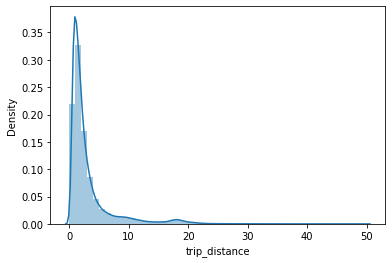

In [13]:
import seaborn as sns
sns.distplot(df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 50)]['trip_distance'])

C:\Users\tulik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

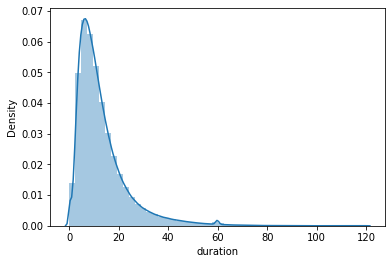

In [14]:
sns.distplot(df[(df['duration'] > 0) & (df['duration'] < 120)]['duration'])

C:\Users\tulik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare_amount', ylabel='Density'>

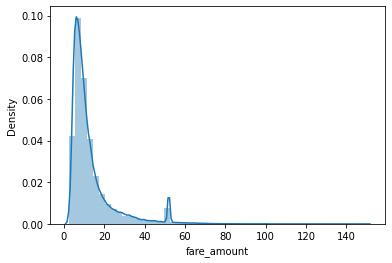

In [15]:
sns.distplot(df[(df['fare_amount'] >= 2.5)&(df['fare_amount'] <= 150)]['fare_amount'])

C:\Users\tulik\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip_amount', ylabel='Density'>

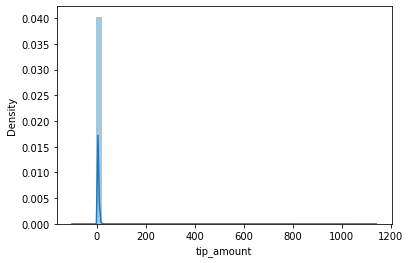

In [16]:
sns.distplot(df.tip_amount)

In [17]:
df = df[(df['passenger_count'] > 0) & (df['passenger_count'] < 7)]

# trip_distance <= 0
df = df[(df['trip_distance'] > 0) & (df['trip_distance'] <= 100)]

# exclude duration longer than 180 mins
df = df[(df['duration'] > 0) & (df['duration'] <= 180)]

# payment method other than cash and credit card
df = df[(df['payment_type'] != 3) & (df['payment_type'] != 4) & (df['payment_type'] != 5) & (df['payment_type'] != 6)]

# exclude instances with fare amount less than 2.5
df = df[(df['fare_amount'] >= 2.5) & (df['fare_amount'] <= 250)]

# remove trips with tip precentage over 50%
df = df[(df['tip_percent'] >= 0) & (df['tip_percent'] <= 50)]

In [18]:
def passenger_convert(row):
    if (row >= 1) & (row <= 2):
        val = "small"
    elif (row > 2) & (row < 5):
        val = "medium"
    else:
        val = "high"
    return val

df['passenger_count'] = df['passenger_count'].apply(passenger_convert)

In [19]:
df['passenger_count'].value_counts()

small     3379954
medium     222492
high       170145
Name: passenger_count, dtype: int64

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import *
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from scipy import stats

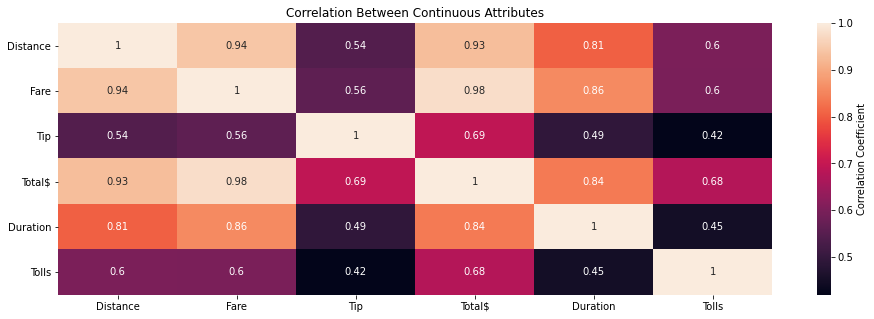

In [23]:
col = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount', 'duration', 'tolls_amount']
label = ['Distance', 'Fare', 'Tip', 'Total$', 'Duration', 'Tolls']
import matplotlib.pyplot as plt
# plot correlation plot
fig, ax = plt.subplots(figsize=(16, 5))
corr_matrix = df[col].corr()
sns.heatmap(corr_matrix, annot=True, ax=ax, cbar_kws={'label': 'Correlation Coefficient'})
ax.set_xticklabels(label)
ax.set_yticklabels(label)
ax.set_title("Correlation Between Continuous Attributes")
plt.show()

In [24]:
sample = df[df['payment_type'] == 1].sample(frac=0.05, replace=True, random_state=30034).reset_index(drop=True)

In [25]:
COL = ['passenger_count', 'fare_amount', 'tip_amount', 'tolls_amount', 'season', 'day_type', 'time_desc']
sample_filtered = sample.loc[:, COL].reset_index(drop=True)

In [26]:
y = sample_filtered['tip_amount']
X_train, X_test, y_train, y_test = train_test_split(sample_filtered, y, test_size=0.3, random_state=0)

In [27]:
xCOLS = ['fare_amount', 'tolls_amount']

scaler = StandardScaler()
X_train[xCOLS] = scaler.fit_transform(X_train[xCOLS])
X_test[xCOLS] = scaler.transform(X_test[xCOLS])

C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\tulik\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Users\tulik\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [28]:
baseline = ols(formula='tip_amount ~ 1', data=X_train).fit()
print(baseline.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 27 Apr 2022   Prob (F-statistic):                nan
Time:                        14:59:30   Log-Likelihood:            -2.2969e+05
No. Observations:               99917   AIC:                         4.594e+05
Df Residuals:                   99916   BIC:                         4.594e+05
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9379      0.008    385.248      0.0

C:\Users\tulik\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\tulik\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\tulik\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [29]:
base_train_pred = baseline.predict(X_train)
base_test_pred = baseline.predict(X_test)
train_rmse = mean_squared_error(y_train, base_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, base_test_pred, squared=False)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 2.4105607505095015
Test RMSE: 2.4214646830412057


In [31]:
full_model = ols(formula='tip_amount ~ C(passenger_count) + fare_amount + tolls_amount + season + time_desc + day_type', data=X_train).fit()
print(full_model.summary())

                            OLS Regression Results                            
Dep. Variable:             tip_amount   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                 1.318e+04
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:59:52   Log-Likelihood:            -1.8767e+05
No. Observations:               99917   AIC:                         3.754e+05
Df Residuals:                   99906   BIC:                         3.755e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [32]:
full_train_pred = full_model.predict(X_train)
full_test_pred = full_model.predict(X_test)
train_rmse = mean_squared_error(y_train, full_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, full_test_pred, squared=False)
train_r2 = r2_score(y_train, full_train_pred)
test_r2 = r2_score(y_test, full_test_pred)

print("Full model")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2", train_r2)
print("Test R2", test_r2)

Full model
Train RMSE: 1.5830139203463771
Test RMSE: 1.5688755929831277
Train R2 0.5687458316640049
Test R2 0.5802163858886205


C:\Users\tulik\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


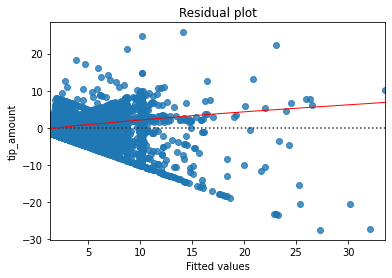

In [33]:
sns.residplot(full_test_pred,y_test,lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})
plt.xlabel("Fitted values")
plt.title('Residual plot')
plt.show()

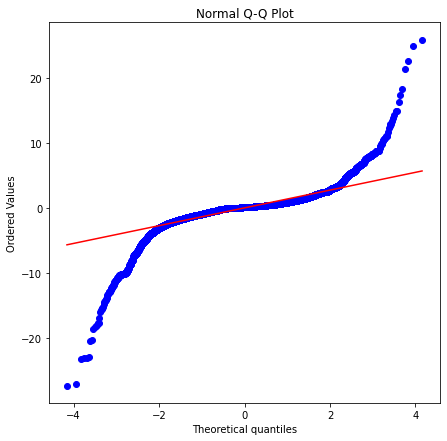

In [34]:
residuals = y_test - full_test_pred

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

C:\Users\tulik\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


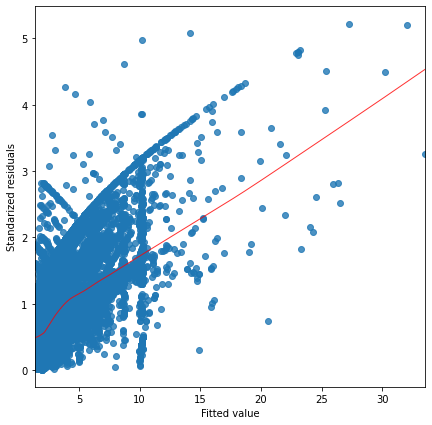

In [35]:
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(residuals))

plt.figure(figsize=(7,7))
sns.regplot(full_test_pred, model_norm_residuals_abs_sqrt,
              scatter=True,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

In [36]:
sample_filtered = pd.get_dummies(sample_filtered, drop_first=True)

In [37]:
y = sample_filtered['tip_amount']
sample_filtered = sample_filtered.drop(['tip_amount'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(sample_filtered, y, test_size=0.3, random_state=0)

In [38]:
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [39]:
reg.feature_importances_

array([9.57566027e-01, 3.24405065e-02, 7.10823171e-04, 1.13328955e-03,
       4.63688705e-03, 4.46109301e-04, 6.31666959e-04, 1.01293270e-03,
       6.80036651e-04, 7.41721197e-04])

In [40]:
gbr_train_pred = reg.predict(X_train)
gbr_test_pred = reg.predict(X_test)
train_rmse = mean_squared_error(y_train, gbr_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, gbr_test_pred, squared=False)
train_r2 = r2_score(y_train, gbr_train_pred)
test_r2 = r2_score(y_test, gbr_test_pred)

print("Gradient Boost Regression")
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("Train R2", train_r2)
print("Test R2", test_r2)

Gradient Boost Regression
Train RMSE: 1.4955406565471216
Test RMSE: 1.5333279112993963
Train R2 0.6150890325112002
Test R2 0.5990238410658886


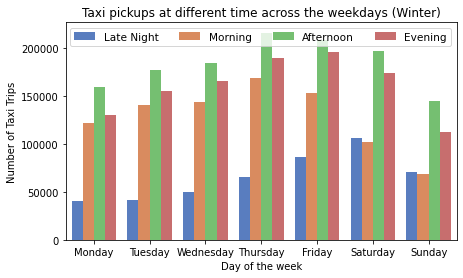

In [42]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wt = pd.crosstab(df['weekday'], df['time_desc']).reindex(cats, axis=0)
stacked_winter = wt.stack().reset_index().rename(columns={0:'pick_ups'})
time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening']
stacked_winter.time_desc = pd.Categorical(stacked_winter.time_desc, categories=time_order)

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(x=stacked_winter.weekday, y=stacked_winter.pick_ups, hue=stacked_winter.time_desc, ax=ax, palette = 'muted')
ax.set_ylabel('Number of Taxi Trips')
ax.set_xlabel('Day of the week')
ax.set_title('Taxi pickups at different time across the weekdays (Winter)')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(loc=1, ncol=len(stacked_winter.time_desc), prop={'size': 10.5})
plt.show()

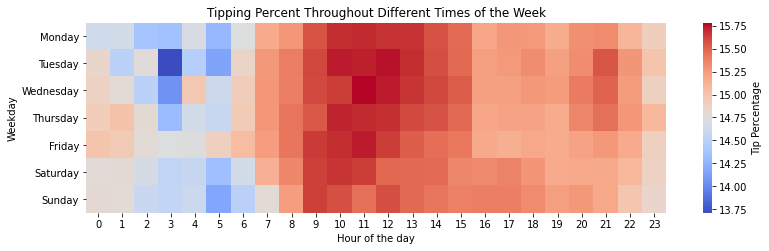

In [43]:
tip = df[df['payment_type'] != 2]

tip_percent = tip.groupby(['weekday', 'time'], as_index=False)['tip_percent'].mean()
tip_percent.weekday = pd.Categorical(tip_percent.weekday, categories=cats)
tip_percent = tip_percent.sort_values(['weekday', 'time']).reset_index(drop=True)
tip_percent_heatmap = pd.pivot_table(tip_percent, values='tip_percent', index='weekday', columns='time')

fig, ax = plt.subplots(figsize=(13, 3.5))
sns.heatmap(tip_percent_heatmap, cbar_kws={'label': 'Tip Percentage'}, ax=ax, cmap='coolwarm')
ax.set_ylabel('Weekday')
ax.set_xlabel('Hour of the day')
ax.set_title('Tipping Percent Throughout Different Times of the Week')
plt.show()

In [44]:
winter_pu_count = pd.crosstab(df['weekday'], df['time'])
winter_pu_count = winter_pu_count.reindex(cats, axis=0)

In [47]:
fig.subplots_adjust(wspace=0.005)
day_hour_winter = sns.heatmap(winter_pu_count.transpose(), ax=ax, cmap="coolwarm", vmax=180000, cbar=False)
fig.colorbar(ax.collections[0], label='Number of trips', ax=ax,location="left", use_gridspec=False, pad=0.07)
day_hour_winter.invert_yaxis()
ax.set_title('winter')
plt.show()

In [48]:
jan.shape

(1369765, 19)

In [49]:
jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1369765 entries, 0 to 1369764
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1271413 non-null  float64
 1   tpep_pickup_datetime   1369765 non-null  object 
 2   tpep_dropoff_datetime  1369765 non-null  object 
 3   passenger_count        1271413 non-null  float64
 4   trip_distance          1369765 non-null  float64
 5   RatecodeID             1271413 non-null  float64
 6   store_and_fwd_flag     1271413 non-null  object 
 7   PULocationID           1369765 non-null  int64  
 8   DOLocationID           1369765 non-null  int64  
 9   payment_type           1271413 non-null  float64
 10  fare_amount            1369765 non-null  float64
 11  extra                  1369765 non-null  float64
 12  mta_tax                1369765 non-null  float64
 13  tip_amount             1369765 non-null  float64
 14  tolls_amount      

In [50]:
jan.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,season
0,1.0,2021-01-01 00:30:10,2021-01-01 00:36:12,1.0,2.10,1.0,N,142,43,2.0,8.0,3.0,0.5,0.00,0.0,0.3,11.80,2.5,Winter
1,1.0,2021-01-01 00:51:20,2021-01-01 00:52:19,1.0,0.20,1.0,N,238,151,2.0,3.0,0.5,0.5,0.00,0.0,0.3,4.30,0.0,Winter
2,1.0,2021-01-01 00:43:30,2021-01-01 01:11:06,1.0,14.70,1.0,N,132,165,1.0,42.0,0.5,0.5,8.65,0.0,0.3,51.95,0.0,Winter
3,1.0,2021-01-01 00:15:48,2021-01-01 00:31:01,0.0,10.60,1.0,N,138,132,1.0,29.0,0.5,0.5,6.05,0.0,0.3,36.35,0.0,Winter
4,2.0,2021-01-01 00:31:49,2021-01-01 00:48:21,1.0,4.94,1.0,N,68,33,1.0,16.5,0.5,0.5,4.06,0.0,0.3,24.36,2.5,Winter


In [51]:
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,season,date,time,weekday,duration,day_type,tip_percent,time_desc
0,1.0,small,2.10,1.0,142,43,2.0,8.0,0.00,0.0,11.80,2.5,Winter,2021-01-01,0,Friday,6.033333,holiday,0.000000,Late Night
1,1.0,small,0.20,1.0,238,151,2.0,3.0,0.00,0.0,4.30,0.0,Winter,2021-01-01,0,Friday,0.983333,holiday,0.000000,Late Night
2,1.0,small,14.70,1.0,132,165,1.0,42.0,8.65,0.0,51.95,0.0,Winter,2021-01-01,0,Friday,27.600000,holiday,16.650626,Late Night
4,2.0,small,4.94,1.0,68,33,1.0,16.5,4.06,0.0,24.36,2.5,Winter,2021-01-01,0,Friday,16.533333,holiday,16.666667,Late Night
5,1.0,small,1.60,1.0,224,68,1.0,8.0,2.35,0.0,14.15,2.5,Winter,2021-01-01,0,Friday,8.016667,holiday,16.607774,Late Night
